# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return 2*x * numpy.sin(x) + (2-x**2) * numpy.cos(x) - 2

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax) - g(xmin)

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [15]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N % 2 != 0:
        N += 1
    # YOUR CODE HERE
    x = lambda i: xmin + i * deltaX
    deltaX = (xmax - xmin) / N

    inBetweenTerms = [f(xmin),f(xmax) ]

    for i in range(1, N):
  
        mult = 4 if i % 2 != 0 else 2
        inBetweenTerms.append(mult* f(x(i)))
    

    return (deltaX / 3) * numpy.sum(inBetweenTerms)


Make sure you have implemented Simpson's rule correctly:

In [16]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [17]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Graph showing how Fractional Error varies with panels used in Simpson Rule')

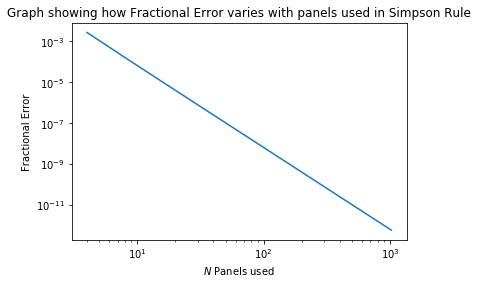

In [18]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use

numeric_res = []

analytic_res = integrate_analytic(x0, x1)

for panels in panel_counts:
    numeric_res.append(numpy.abs(integrate_numeric(x0,x1, panels) - analytic_res)/analytic_res)

plt.loglog(panel_counts, numeric_res)
plt.xlabel("$N$ Panels used")
plt.ylabel("Fractional Error")
plt.title("Graph showing how Fractional Error varies with panels used in Simpson Rule")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method. If the amount of panels is too large the program wiull take too long to finish. This is despite the fact that the simpsons rule is generally $O(n)$. It should be noted that you are limited by the fact that floating point numbers can only hold a certain precision so even if $N$ (number of panels) is increased to a very large number, the actual precision may not increase accordingly and you may get dwindling returns.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the panels used for the trapezium rule would increase the accuracy. Thought again it would be limited by the precision of floating point numbers. Additionally it would take more and more time as the number of panels are increased.